In [1]:
from gurobipy import *
from math import * 

In [2]:
#n=4

In [3]:
"""

Poikonen, S., & Golden, B. (2020). 
The mothership and drone routing problem. 
INFORMS Journal on Computing, 32(2), 249-262.

https://drive.google.com/file/d/1C_4_F6HzwCA3upkeWnZ0CWkMoHHefzy5/view

"""

s=((10,10),((10,90),(20,90)),((90,15),(90,10),(88,5)),((50,0),(35,5)),(10,10));

orig=(10,10)
dest=(10,10)
R=20
alpha=2

In [4]:
M=len(s)-2

In [5]:
#s[i][j-1]
#s[2][1]

In [6]:
def first(ST_i):
    if ST_i==s[0]:
        return ST_i
    else:
        return ST_i[0]
def last(ST_i):
    if ST_i==s[0]:
        return ST_i
    else:
        return ST_i[ len(ST_i)-1 ]
    

import numpy as np
def distance(tx,ty ,lx,ly):
    x_dist = (tx - lx)**2
    y_dist = (ty - ly)**2
    dist = np.sqrt(x_dist + y_dist )
    return dist   


In [7]:
leng={}

In [8]:
for k in range(0,M+1):
    if k==0:
        leng[k]=0
    else:
        leng[k]=sum( distance(s[k][j][0],s[k][j][1],s[k][j+1][0],s[k][j+1][1]) for j in range (0,len(s[k])-1))

In [9]:
# Create a new model
m = Model("Poikonen_2019")

Academic license - for non-commercial use only


In [10]:
# Create variables

cTime = {};
sTime = {};

lPoint_x= {};
lPoint_y= {};

rPoint_x= {};
rPoint_y= {};


outFlightDist = {};
inFlightDist = {};
intraFlightDisk={};

#for SOCP
Cx= {};
Cy= {};
C= {};


In [11]:
for i in range(0, M+1):
    
    
    outFlightDist[i] = m.addVar(lb=0.0,vtype = 'C',name='outFlightDist[%s]'%i);
    inFlightDist[i] = m.addVar(lb=0.0,vtype = 'C',name='inFlightDist[%s]'%i);
    intraFlightDisk[i] = m.addVar(lb=0.0,vtype = 'C',name='intraFlightDisk[%s]'%i);
    

    

for i in range(0, M+2):
    lPoint_x[i] = m.addVar(vtype = 'C',name='lPoint_x[%s]'%i);
    lPoint_y[i] = m.addVar(vtype = 'C',name='lPoint_y[%s]'%i);
    
    rPoint_x[i] = m.addVar(vtype = 'C',name='rPoint_x[%s]'%i);
    rPoint_y[i] = m.addVar(vtype = 'C',name='rPoint_y[%s]'%i);
    
    cTime[i] = m.addVar(lb=0.0,vtype = 'C',name='cTime[%s]'%i);
    
    sTime[i] = m.addVar(lb=0.0,vtype = 'C',name='sTime[%s]'%i);
    

m.update()

In [12]:

# Add constraint: 
ctr=0;


#E8
m.addConstr( lPoint_x[0]==orig[0]);
m.addConstr( lPoint_y[0]==orig[1] ); 
#E9
m.addConstr( rPoint_x[0]==orig[0] ); 
m.addConstr( rPoint_y[0]==orig[1]); 
#E10
m.addConstr( lPoint_x[M+1]==dest[0]); 
m.addConstr( lPoint_y[M+1]==dest[1] ); 
#E11
m.addConstr( rPoint_x[M+1]==dest[0]); 
m.addConstr( rPoint_y[M+1]==dest[1]); 

for k in range(0, M+1):
    #E1
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A2');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A2');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A2');
    
    
    m.addConstr( Cx[ctr]  == lPoint_x[k+1] - rPoint_x[k], 'A2x.1'); 
    m.addConstr( Cy[ctr]  == lPoint_y[k+1] - rPoint_y[k], 'A2y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A2.2');
    m.addConstr( C[ctr]-cTime[k]   == 0, 'A2.3');
    
    #E2
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A3');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A3');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A3');
    
    
    m.addConstr( Cx[ctr]  == lPoint_x[k] - rPoint_x[k], 'A3x.1'); 
    m.addConstr( Cy[ctr]  == lPoint_y[k] - rPoint_y[k], 'A3y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A3.2');
    m.addConstr( C[ctr]-sTime[k]   == 0, 'A3.3');
    
    
    #E3
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A4');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A4');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A4');
    
    
    m.addConstr( Cx[ctr]  == first(s[k])[0] - lPoint_x[k], 'A4x.1'); 
    m.addConstr( Cy[ctr]  == first(s[k])[1] - lPoint_y[k], 'A4y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A4.2');
    m.addConstr( C[ctr]-outFlightDist[k]   == 0, 'A4.3'); 
    
    #E4
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A5');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A5');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A5');
    
    
    m.addConstr( Cx[ctr]  == last(s[k])[0] - rPoint_x[k], 'A5x.1'); 
    m.addConstr( Cy[ctr]  == last(s[k])[1]  - rPoint_y[k], 'A5y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A5.2');
    m.addConstr( C[ctr]-inFlightDist[k]   == 0, 'A5.3'); 
    
    
    
    #E5
    m.addConstr( intraFlightDisk[k] >= leng[k], 'E5'); 
    
    
    #E6
    m.addConstr( (outFlightDist[k] + intraFlightDisk[k]+inFlightDist[k])/alpha   <= sTime[k], 'A6'); 
    
    #E7
    m.addConstr( sTime[k]   <= R, 'A7'); 
    
    
    
    
    
    

In [13]:
# Set objective:


obj = quicksum((cTime[k]+sTime[k]) for k in range(0,M+2))

m.setObjective(obj,GRB.MINIMIZE)

In [14]:
m.optimize()

Optimize a model with 68 rows, 90 columns and 144 nonzeros
Model has 16 quadratic constraints
Coefficient statistics:
  Matrix range     [5e-01, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 9e+01]
Presolve removed 50 rows and 48 columns
Presolve time: 0.02s
Presolved: 33 rows, 42 columns, 65 nonzeros
Presolved model has 13 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.200e+02
 Factor NZ  : 3.190e+02
 Factor Ops : 3.881e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.14518458e+03  1.56048328e+01  1.24e+02 1.87e+00  1.58e+02     0s
   1   5.10927851e+02 -2.54749150e+02  3.36e+01 2.06e-06  2.39e+01     0s
   2   2.80979749e+02  3.58175206e+01  4.89e+00 3.08e-07  5.27e+00     0s
   3   2.57769306e+02  2.06897987e+02  2

<function matplotlib.pyplot.show(*args, **kw)>

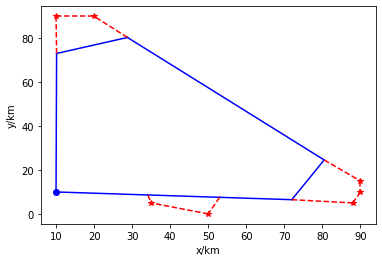

In [20]:
import matplotlib.pyplot as plt
plt.xlabel("x/km")
plt.ylabel("y/km")

plt.plot([lPoint_x[1].X, orig[0]],[lPoint_y[1].X,  orig[1]], color= 'b')
plt.plot([rPoint_x[M].X, dest[0]],[rPoint_y[M].X,  dest[1]], color= 'b')

for i in range(1,M+1):
    plt.plot([lPoint_x[i].X, rPoint_x[i].X],[lPoint_y[i].X,  rPoint_y[i].X], color= 'b')
    if i<M:
        plt.plot([lPoint_x[i+1].X, rPoint_x[i].X],[lPoint_y[i+1].X,  rPoint_y[i].X], color= 'b')


#for i in range(1,M+1):
    #plt.plot([s[i][0] ,  rPoint_x[i].X] ,[s[i][1],  rPoint_y[i].X],linestyle= '--')
    #plt.plot([lPoint_x[i].X, s[i][0]],[lPoint_y[i].X,  s[i][1]],linestyle= '--')
    #plt.plot(s[i][0], s[i][1], marker='*',color='r')
    
for i in range(1,M+1):
    for j in range(0,len(s[i])):
        plt.plot(s[i][j][0], s[i][j][1], marker='*',color='r')
        
    plt.plot([lPoint_x[i].X, first(s[i])[0]],[lPoint_y[i].X,  first(s[i])[1]],linestyle= '--',color='r')
    plt.plot([rPoint_x[i].X, last(s[i])[0]],[rPoint_y[i].X,  last(s[i])[1]],linestyle= '--',color='r')
    for j in range(0,len(s[i])-1):
        plt.plot([s[i][j][0], s[i][j+1][0]],[s[i][j][1], s[i][j+1][1]],linestyle= '--',color='r')
    

plt.plot(s[0][0], s[0][1], marker='o',color='b')

plt.show

In [16]:
lPoint_x

{0: <gurobi.Var lPoint_x[0] (value 10.0)>,
 1: <gurobi.Var lPoint_x[1] (value 10.147009395110645)>,
 2: <gurobi.Var lPoint_x[2] (value 80.47668450628849)>,
 3: <gurobi.Var lPoint_x[3] (value 52.98395458620367)>,
 4: <gurobi.Var lPoint_x[4] (value 10.0)>}

In [17]:
lPoint_y

{0: <gurobi.Var lPoint_y[0] (value 10.0)>,
 1: <gurobi.Var lPoint_y[1] (value 73.04950864598176)>,
 2: <gurobi.Var lPoint_y[2] (value 24.573488396826214)>,
 3: <gurobi.Var lPoint_y[3] (value 7.5575496116504945)>,
 4: <gurobi.Var lPoint_y[4] (value 10.0)>}

In [18]:
rPoint_x

{0: <gurobi.Var rPoint_x[0] (value 10.0)>,
 1: <gurobi.Var rPoint_x[1] (value 28.771303778337987)>,
 2: <gurobi.Var rPoint_x[2] (value 71.95672487095203)>,
 3: <gurobi.Var rPoint_x[3] (value 34.130113790879)>,
 4: <gurobi.Var rPoint_x[4] (value 10.0)>}

In [19]:
rPoint_y

{0: <gurobi.Var rPoint_y[0] (value 10.0)>,
 1: <gurobi.Var rPoint_y[1] (value 80.33888237517486)>,
 2: <gurobi.Var rPoint_y[2] (value 6.479028281071176)>,
 3: <gurobi.Var rPoint_y[3] (value 8.629236092378644)>,
 4: <gurobi.Var rPoint_y[4] (value 10.0)>}